In [1]:
from src.test_non_local_switching_non_stationary_model import load_data

is_ripple, spikes, position, speed, env, time = load_data(work_computer=False)


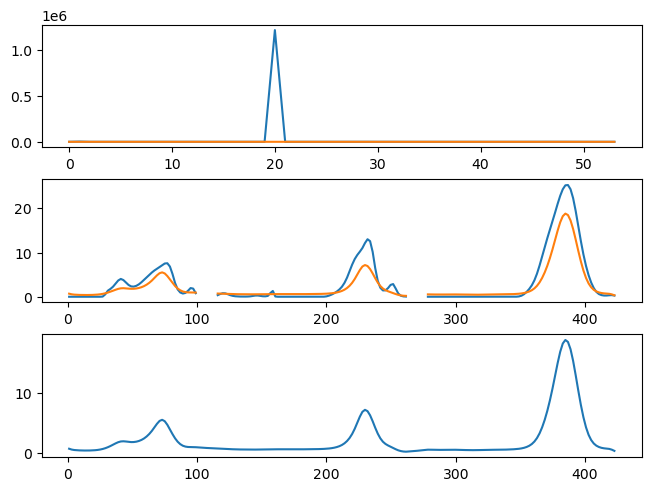

In [42]:
from src.hmm import fit_penalized_regression, fit_regression
from src.test_non_local_switching_non_stationary_model import make_spline_predict_matrix, make_spline_design_matrix
import matplotlib.pyplot as plt
import numpy as np

is_training = ~is_ripple
emission_knot_spacing = 8.0

is_on_track = np.ones_like(env.is_track_interior_, dtype=float)
is_on_track[~env.is_track_interior_] = np.nan


emission_design_matrix = make_spline_design_matrix(
    position, env.place_bin_edges_, knot_spacing=emission_knot_spacing
)
emission_predict_matrix = make_spline_predict_matrix(
    emission_design_matrix.design_info, env.place_bin_centers_
)

neuron_idx = 14

fig, axes = plt.subplots(3, 1, constrained_layout=True)

result = fit_regression(emission_design_matrix, is_training, spikes[:, neuron_idx])
axes[0].plot(np.exp(result[1:]))
axes[1].plot(env.place_bin_centers_, 500.0 * np.exp(emission_predict_matrix @ result) * is_on_track)

pen_result = fit_penalized_regression(emission_design_matrix, is_training, spikes[:, neuron_idx], penalty=1e-5)
axes[0].plot(np.exp(pen_result[1:]))
axes[1].plot(env.place_bin_centers_, 500.0 * np.exp(emission_predict_matrix @ pen_result) * is_on_track)

axes[2].plot(env.place_bin_centers_, 500.0 * np.exp(emission_predict_matrix @ pen_result))



In [41]:
spikes[:, neuron_idx].sum()

88.0